# Part 2

### #1 Bringing it all in

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\evras\Desktop\Data Analysis\Immersion\A4 Python\Instacart Basket Analysis'
path

'C:\\Users\\evras\\Desktop\\Data Analysis\\Immersion\\A4 Python\\Instacart Basket Analysis'

In [3]:
#importing the files
df_fusion=pd.read_pickle(os.path.join(path,'02 Data', 'Preped Data','ords_prods_cust.pkl'))

In [4]:
df_fusion.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,product_id,department_id,prices,busiest_period_of_day,loyalty_flag,user_age,user_dependants,user_family_status,user_income
0,2539329,1,1,2,8,196,7,9.0,Average Orders,New Customer,31,3,married,40423
1,2398795,1,2,3,7,196,7,9.0,Average Orders,New Customer,31,3,married,40423
2,473747,1,3,3,12,196,7,9.0,Most orders,New Customer,31,3,married,40423
3,2254736,1,4,4,7,196,7,9.0,Average Orders,New Customer,31,3,married,40423
4,431534,1,5,4,15,196,7,9.0,Most orders,New Customer,31,3,married,40423


In [5]:
df_fusion['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### #2 doing the exercise stuff

<AxesSubplot:>

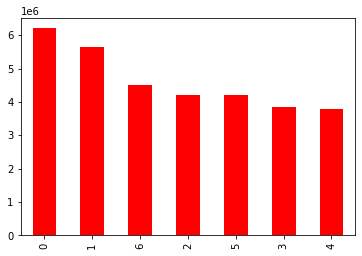

In [6]:
#first stop, bar chart! With a dash of hexidecimal color!
df_fusion['order_day_of_week'].value_counts().plot.bar(color='#ff0000')

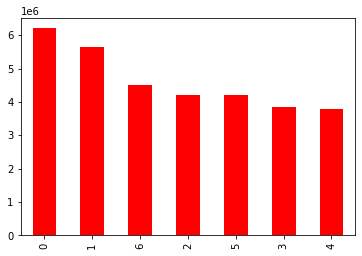

In [7]:
#just gonna give it a variable home for now
ex_bar=df_fusion['order_day_of_week'].value_counts().plot.bar(color='#ff0000')

<AxesSubplot:ylabel='Frequency'>

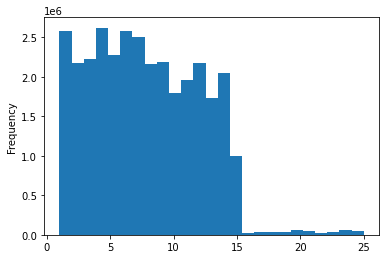

In [8]:
#histogram of prices because thats what the examle in the exercise did
df_fusion['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

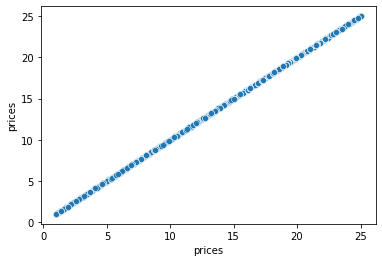

In [9]:
sns.scatterplot(x='prices',y='prices',data=df_fusion)

In [10]:
#ok going to do a 70/30 on the next one for the sample
np.random.seed(4)

In [11]:
dev=np.random.rand(len(df_fusion)) <=0.7

In [12]:
#setting the results into big (70) and small (30)
big=df_fusion[dev]

In [13]:
small=df_fusion[~dev]

In [14]:
#checking to make sure they add up right
len(big)+len(small)

32399732

In [15]:
len(df_fusion)

32399732

In [16]:
len(big)

22680123

In [17]:
#subbing out the two columns I actually need for the line
small_fusion=small[['order_day_of_week','prices']]

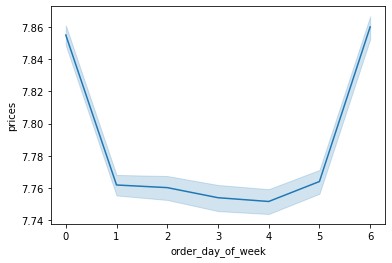

In [18]:
#doing the line
line=sns.lineplot(data = small_fusion, x = 'order_day_of_week', y = 'prices')

### #3 histgram for marketing

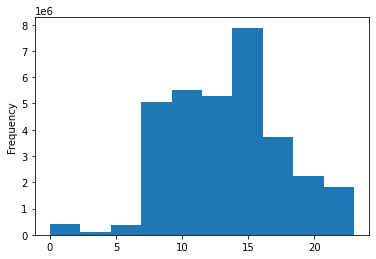

In [19]:
#I'm going to just keeep going for a bit here.
#the request doesn't mention groups of hours so I wont do any bins
hoursshopping=df_fusion['order_hour_of_day'].plot.hist()

In [21]:
hoursshopping.figure.savefig(os.path.join(path,'04 Analysis', 'Viz','shopping_hours.png'))

###### this would seem to indicate that the vast majority of purchases happen between 7am and 3pm, with a notable spike around 3pm.

### #4 loyalty distrobution

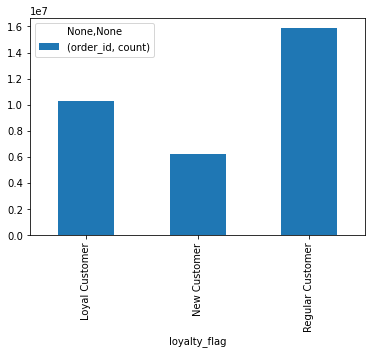

In [22]:
#they want to see how many purches people in the differnt loyalty flags do
#so maybe do groupby loyalty and then just use order id?
#then aggro it with a count of order_ids?
loyaltyshopping=df_fusion.groupby('loyalty_flag').agg({'order_id':['count']}).plot.bar()

In [23]:
loyaltyshopping.figure.savefig(os.path.join(path,'04 Analysis', 'Viz','loyalty_shopping.png'))

In [24]:
#holy shit that actually worked! sweet. Too bad it always comes out as a weird decimal. Not sure what's going on there.
#A question for later I suppose

### #5 hours line chart

In [25]:
#I already have a randomized supset for this so we'll just call on that for now
small_fusion2=small[['order_id','order_hour_of_day','prices']]

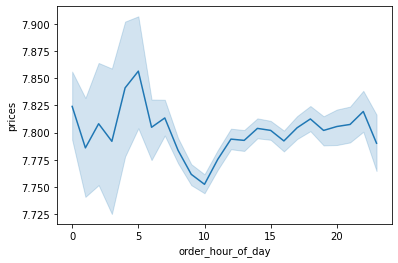

In [26]:
line2=sns.lineplot(x = 'order_hour_of_day', y = 'prices', data = small_fusion2)

In [27]:
line2.figure.savefig(os.path.join(path,'04 Analysis', 'Viz','hours_pricesLine.png'))

### #6 another line chart, but this time it's personal

In [28]:
#this is another weird choice. Wouldn't it be better served to do a scatter plot?
#if we're looking for the relatinsihp between the two things ... idk let's have a look
small_fusion3=small[['user_age','user_dependants']]

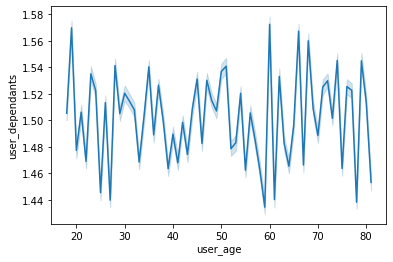

In [29]:
line3=sns.lineplot(x='user_age',y='user_dependants',data=small_fusion3)

###### well, somewhat predicably the age and number of dependants is a little all over the place. Not surprisingly it stops waaaaay off in the late 70s

In [31]:
line3.figure.savefig(os.path.join(path,'04 Analysis', 'Viz','dependants_age.png'))

### #7 scatter the age of spending

In [32]:
small_fusion4=small[['user_age','user_income']]

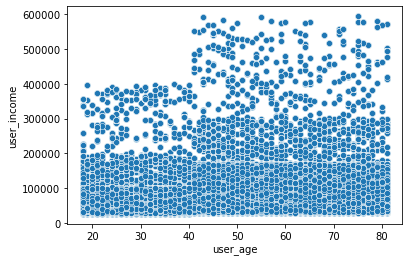

In [33]:
line4=sns.scatterplot(x='user_age',y='user_income',data=small_fusion4)

###### well, this chart is a little ... full, but I would have to say that it would seem that the older the customers are the more money they make

In [35]:
line4.figure.savefig(os.path.join(path,'04 Analysis', 'Viz','age_income.png'))